# Análise Geral - Base Manga Produtos (Tratada)

Análise exploratória da base de dados de produtos derivados de manga.  
Nesta primeira parte: **análise do produto Polpa congelada** em relação às demais colunas e ao restante da base.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
%matplotlib inline

In [2]:
# Carregar base tratada
df = pd.read_csv('BASE_1_Manga_Produtos_TRATADA.csv')
print(f"Total de registros: {len(df)}")
df.head()

Total de registros: 1700


,empresa,faturamento_empresa_brl,produto,tipo_cliente,mercado_principal,indice_concorrencia_1a5,indice_valor_agregado_1a5,margem_media_percentual,indice_complexidade_produtiva_1a5,indice_capex_1a5,indice_escalabilidade_1a5,indice_exigencia_regulatoria_1a5,certificacoes_principais,indice_compatibilidade_refugo_1a5,indice_compatibilidade_operacao_fazenda_1a5,miss__empresa,miss__faturamento_empresa_brl,miss__produto,miss__tipo_cliente,miss__mercado_principal,miss__indice_concorrencia_1a5,miss__indice_valor_agregado_1a5,miss__margem_media_percentual,miss__indice_complexidade_produtiva_1a5,miss__indice_capex_1a5,miss__indice_escalabilidade_1a5,miss__indice_exigencia_regulatoria_1a5,miss__certificacoes_principais,miss__indice_compatibilidade_refugo_1a5,miss__indice_compatibilidade_operacao_fazenda_1a5
0,BRF Ingredients,5.300000e+10,Sorbet / picolé,B2B,Interno,2.0,3.5,45.66,4.0,1.0,1.0,3.0,ANVISA,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Ambev (bebidas),7.200000e+10,Purê de manga asséptico,B2C,Externo,2.0,3.0,12.79,3.0,1.0,3.0,3.0,ANVISA,1.0,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Bunge Brasil,9.500000e+10,Biocomposto / fertilizante orgânico,B2B,Externo,4.0,2.0,12.31,2.0,3.0,3.0,2.0,ANVISA,3.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,MangaVale Alimentos,4.800000e+08,Sabonete / hidratante com manga,B2B,Ambos,1.0,2.5,37.29,3.0,2.0,1.0,2.0,MAPA,2.0,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Cutrale,3.000000e+10,Corante natural,B2B,Interno,3.0,3.5,13.45,4.0,2.0,4.0,3.0,MAPA,2.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 1. Foco: Produto Polpa congelada

Separamos os registros de **Polpa congelada** e o **restante da base** para comparação.

In [3]:
polpa = df[df['produto'] == 'Polpa congelada'].copy()
outros = df[df['produto'] != 'Polpa congelada'].copy()

print(f"Registros de Polpa congelada: {len(polpa)}")
print(f"Registros de outros produtos: {len(outros)}")
polpa.head()

Registros de Polpa congelada: 60
Registros de outros produtos: 1640


,empresa,faturamento_empresa_brl,produto,tipo_cliente,mercado_principal,indice_concorrencia_1a5,indice_valor_agregado_1a5,margem_media_percentual,indice_complexidade_produtiva_1a5,indice_capex_1a5,indice_escalabilidade_1a5,indice_exigencia_regulatoria_1a5,certificacoes_principais,indice_compatibilidade_refugo_1a5,indice_compatibilidade_operacao_fazenda_1a5,miss__empresa,miss__faturamento_empresa_brl,miss__produto,miss__tipo_cliente,miss__mercado_principal,miss__indice_concorrencia_1a5,miss__indice_valor_agregado_1a5,miss__margem_media_percentual,miss__indice_complexidade_produtiva_1a5,miss__indice_capex_1a5,miss__indice_escalabilidade_1a5,miss__indice_exigencia_regulatoria_1a5,miss__certificacoes_principais,miss__indice_compatibilidade_refugo_1a5,miss__indice_compatibilidade_operacao_fazenda_1a5
33,Duas Rodas,4.200000e+09,Polpa congelada,B2B,Interno,2.0,3.0,42.770000,5.0,3.0,2.0,1.0,MAPA,1.0,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
46,Nao informado,6.500000e+08,Polpa congelada,B2C,Ambos,3.0,2.0,33.900000,3.0,4.0,4.0,1.0,Nenhuma,3.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
53,BRF Ingredients,5.300000e+10,Polpa congelada,B2B,Ambos,3.0,2.0,17.560000,3.0,2.0,3.0,1.0,ANVISA,1.0,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
73,BioManga Circular,1.200000e+08,Polpa congelada,B2C,Interno,2.0,4.0,20.553938,4.0,3.0,2.0,4.0,Internacional,2.0,3.0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
92,JBS Ingredients,3.750000e+11,Polpa congelada,B2B,Interno,4.0,3.5,40.192527,4.0,5.0,3.0,3.0,ANVISA,1.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## 2. Colunas numéricas: Polpa congelada vs base

Comparação das métricas numéricas (média) entre Polpa congelada e o restante da base.

In [13]:
# Colunas numéricas principais (excluindo miss__ e texto)
cols_num = ['faturamento_empresa_brl', 'indice_concorrencia_1a5', 'indice_valor_agregado_1a5',
            'margem_media_percentual', 'indice_complexidade_produtiva_1a5', 'indice_capex_1a5',
            'indice_escalabilidade_1a5', 'indice_exigencia_regulatoria_1a5',
            'indice_compatibilidade_refugo_1a5', 'indice_compatibilidade_operacao_fazenda_1a5']

comp = pd.DataFrame({
    'Polpa congelada (média)': polpa[cols_num].mean(),
    'Restante da base (média)': outros[cols_num].mean(),
})
comp['Diferença'] = comp['Polpa congelada (média)'] - comp['Restante da base (média)']
comp['Em relação à base'] = comp['Diferença'].apply(
    lambda x: 'Acima' if x > 0 else ('Abaixo' if x < 0 else 'Igual'))
comp




,Polpa congelada (média),Restante da base (média),Diferença,Em relação à base
faturamento_empresa_brl,4.279667e+10,4.168965e+10,1.107020e+09,Acima
indice_concorrencia_1a5,2.633333e+00,2.999390e+00,-3.660569e-01,Abaixo
indice_valor_agregado_1a5,2.750000e+00,2.907927e+00,-1.579268e-01,Abaixo
margem_media_percentual,2.755114e+01,2.840253e+01,-8.513876e-01,Abaixo
indice_complexidade_produtiva_1a5,2.933333e+00,3.042683e+00,-1.093496e-01,Abaixo
indice_capex_1a5,3.016667e+00,2.816463e+00,2.002033e-01,Acima
indice_escalabilidade_1a5,3.016667e+00,3.042683e+00,-2.601626e-02,Abaixo
indice_exigencia_regulatoria_1a5,2.566667e+00,2.773171e+00,-2.065041e-01,Abaixo
indice_compatibilidade_refugo_1a5,2.266667e+00,2.296341e+00,-2.967480e-02,Abaixo
indice_compatibilidade_operacao_fazenda_1a5,2.583333e+00,2.582927e+00,4.065041e-04,Acima


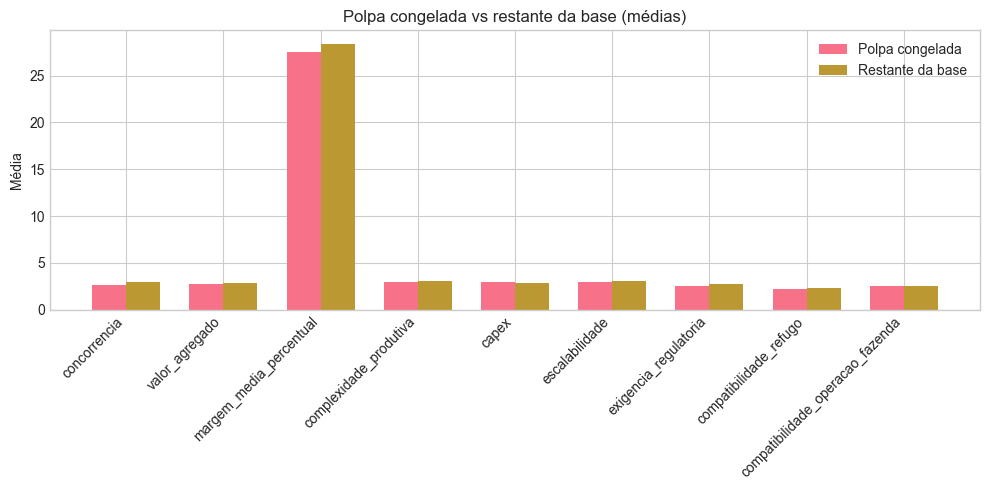

In [5]:
# Visualização: comparação das médias (índices 1-5 e margem %)
indices = [c for c in cols_num if 'indice' in c or c == 'margem_media_percentual']
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(indices))
w = 0.35
ax.bar(x - w/2, comp.loc[indices, 'Polpa congelada (média)'], w, label='Polpa congelada')
ax.bar(x + w/2, comp.loc[indices, 'Restante da base (média)'], w, label='Restante da base')
ax.set_xticks(x)
ax.set_xticklabels([c.replace('indice_', '').replace('_1a5', '') for c in indices], rotation=45, ha='right')
ax.set_ylabel('Média')
ax.legend()
ax.set_title('Polpa congelada vs restante da base (médias)')
plt.tight_layout()
plt.show()

## 3. Colunas categóricas: perfil da Polpa congelada

Distribuição de **tipo_cliente**, **mercado_principal** e **certificacoes_principais**.

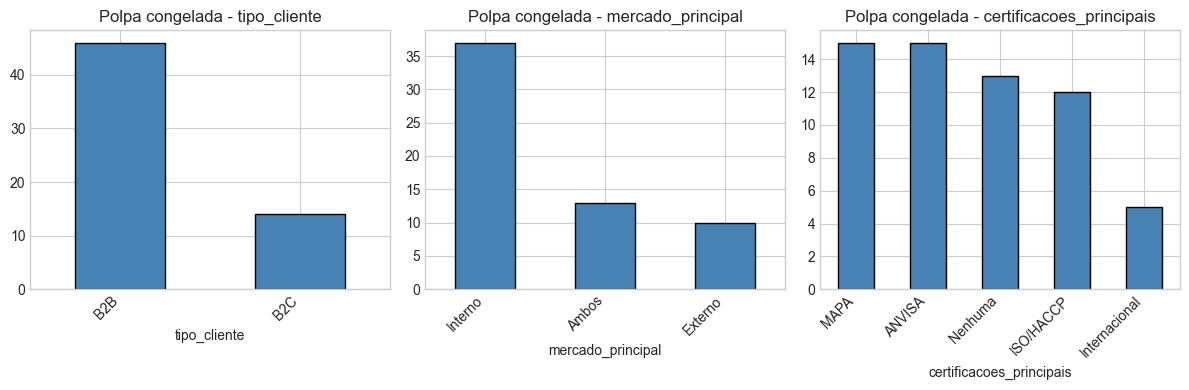

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for ax, col in zip(axes, ['tipo_cliente', 'mercado_principal', 'certificacoes_principais']):
    polpa[col].value_counts().plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
    ax.set_title(f'Polpa congelada - {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
# Comparação % tipo_cliente e mercado_principal
print('=== Polpa congelada ===')
print(polpa['tipo_cliente'].value_counts(normalize=True).round(2))
print()
print(polpa['mercado_principal'].value_counts(normalize=True).round(2))
print()
print('=== Restante da base ===')
print(outros['tipo_cliente'].value_counts(normalize=True).round(2))
print()
print(outros['mercado_principal'].value_counts(normalize=True).round(2))

=== Polpa congelada ===
tipo_cliente
B2B    0.77
B2C    0.23
Name: proportion, dtype: float64

mercado_principal
Interno    0.62
Ambos      0.22
Externo    0.17
Name: proportion, dtype: float64

=== Restante da base ===
tipo_cliente
B2B              0.74
B2C              0.26
Nao informado    0.00
Name: proportion, dtype: float64

mercado_principal
Interno          0.50
Externo          0.26
Ambos            0.24
Nao informado    0.00
Name: proportion, dtype: float64


## 4. Vantagens e desvantagens da Polpa congelada (em relação à base)

Síntese com base nas comparações numéricas e no perfil do produto.

In [8]:
# Resumo numérico para interpretação
resumo = comp[['Polpa congelada (média)', 'Restante da base (média)', 'Diferença']].round(2)
resumo

,Polpa congelada (média),Restante da base (média),Diferença
faturamento_empresa_brl,4.279667e+10,4.168965e+10,1.107020e+09
indice_concorrencia_1a5,2.630000e+00,3.000000e+00,-3.700000e-01
indice_valor_agregado_1a5,2.750000e+00,2.910000e+00,-1.600000e-01
margem_media_percentual,2.755000e+01,2.840000e+01,-8.500000e-01
indice_complexidade_produtiva_1a5,2.930000e+00,3.040000e+00,-1.100000e-01
indice_capex_1a5,3.020000e+00,2.820000e+00,2.000000e-01
indice_escalabilidade_1a5,3.020000e+00,3.040000e+00,-3.000000e-02
indice_exigencia_regulatoria_1a5,2.570000e+00,2.770000e+00,-2.100000e-01
indice_compatibilidade_refugo_1a5,2.270000e+00,2.300000e+00,-3.000000e-02
indice_compatibilidade_operacao_fazenda_1a5,2.580000e+00,2.580000e+00,0.000000e+00


### Vantagens da Polpa congelada (onde tende a ser melhor que a média da base)
- **Exigência regulatória**: quando o índice é *menor*, menos exigência → vantagem se Polpa tiver média menor.
- **Compatibilidade com refugo/operação na fazenda**: índices mais altos = mais compatível → vantagem se Polpa tiver média maior.
- **Margem**: margem média maior que o restante da base é vantagem.
- **Concorrência**: índice menor = menos concorrência → vantagem.
- **Capex**: índice menor = menor investimento → vantagem.

### Desvantagens da Polpa congelada (onde tende a ser pior que a média da base)
- **Valor agregado**: índice menor = menos valor agregado → desvantagem.
- **Complexidade produtiva / escalabilidade**: depende do objetivo (maior pode ser custo, menor pode ser capacidade).
- **Faturamento das empresas**: se as empresas que atuam em Polpa forem em média menores, pode indicar mercado mais fragmentado.

In [9]:
# Interpretação automática baseada na direção "melhor" de cada indicador
# Convenção: para concorrência, capex, exigência regulatória -> menor é melhor
# Para valor agregado, margem, compatibilidade refugo/fazenda, escalabilidade -> maior é melhor

melhor_quando_menor = ['indice_concorrencia_1a5', 'indice_capex_1a5', 'indice_exigencia_regulatoria_1a5', 'indice_complexidade_produtiva_1a5']
melhor_quando_maior = ['indice_valor_agregado_1a5', 'margem_media_percentual', 
                       'indice_compatibilidade_refugo_1a5', 'indice_compatibilidade_operacao_fazenda_1a5',
                       'indice_escalabilidade_1a5']

vantagens = []
desvantagens = []

for c in melhor_quando_menor:
    if c in comp.index:
        d = comp.loc[c, 'Diferença']
        if d < 0:
            vantagens.append(f"{c}: Polpa congelada tem média menor ({comp.loc[c, 'Polpa congelada (média)']:.2f} vs {comp.loc[c, 'Restante da base (média)']:.2f})")
        elif d > 0:
            desvantagens.append(f"{c}: Polpa congelada tem média maior ({comp.loc[c, 'Polpa congelada (média)']:.2f} vs {comp.loc[c, 'Restante da base (média)']:.2f})")

for c in melhor_quando_maior:
    if c in comp.index:
        d = comp.loc[c, 'Diferença']
        if d > 0:
            vantagens.append(f"{c}: Polpa congelada tem média maior ({comp.loc[c, 'Polpa congelada (média)']:.2f} vs {comp.loc[c, 'Restante da base (média)']:.2f})")
        elif d < 0:
            desvantagens.append(f"{c}: Polpa congelada tem média menor ({comp.loc[c, 'Polpa congelada (média)']:.2f} vs {comp.loc[c, 'Restante da base (média)']:.2f})")

print('--- VANTAGENS (Polpa congelada em relação à base) ---')
for v in vantagens:
    print('•', v)
print()
print('--- DESVANTAGENS (Polpa congelada em relação à base) ---')
for d in desvantagens:
    print('•', d)

--- VANTAGENS (Polpa congelada em relação à base) ---
• indice_concorrencia_1a5: Polpa congelada tem média menor (2.63 vs 3.00)
• indice_exigencia_regulatoria_1a5: Polpa congelada tem média menor (2.57 vs 2.77)
• indice_complexidade_produtiva_1a5: Polpa congelada tem média menor (2.93 vs 3.04)
• indice_compatibilidade_operacao_fazenda_1a5: Polpa congelada tem média maior (2.58 vs 2.58)

--- DESVANTAGENS (Polpa congelada em relação à base) ---
• indice_capex_1a5: Polpa congelada tem média maior (3.02 vs 2.82)
• indice_valor_agregado_1a5: Polpa congelada tem média menor (2.75 vs 2.91)
• margem_media_percentual: Polpa congelada tem média menor (27.55 vs 28.40)
• indice_compatibilidade_refugo_1a5: Polpa congelada tem média menor (2.27 vs 2.30)
• indice_escalabilidade_1a5: Polpa congelada tem média menor (3.02 vs 3.04)


In [14]:
df.groupby('produto')['indice_valor_agregado_1a5'].mean().sort_values(ascending=False)


produto
Chutney de manga                              3.206522
Esfoliante natural                            3.077586
Subproduto industrial de bagaço processado    3.027273
Óleo / manteiga de semente de manga           3.019608
Molho agridoce / culinário                    3.009091
Aroma / extrato natural                       3.000000
Nao informado                                 2.994681
Concentrado de manga                          2.992063
Fragrância para perfumaria                    2.989362
Base cosmética (extrato)                      2.984127
Sorbet / picolé                               2.978571
Fibra alimentar de manga                      2.976923
Corante natural                               2.971154
Purê de manga asséptico                       2.957627
Cubos IQF                                     2.950980
Suco pronto (NFC)                             2.923077
Manga desidratada em pedaços                  2.913793
Snack de manga desidratada                    2.894231
Ge

In [15]:
df.groupby('produto')['faturamento_empresa_brl'].mean().sort_values(ascending=False)


produto
Biocomposto / fertilizante orgânico           6.830733e+10
Fragrância para perfumaria                    6.825085e+10
Biogás / energia                              5.722407e+10
Cubos IQF                                     5.658078e+10
Óleo / manteiga de semente de manga           5.218922e+10
Esfoliante natural                            4.914034e+10
Pectina                                       4.789898e+10
Snack de manga desidratada                    4.666000e+10
Geleia/compota                                4.569133e+10
Base cosmética (extrato)                      4.502540e+10
Manga desidratada em pedaços                  4.401379e+10
Purê de manga asséptico                       4.327983e+10
Polpa congelada                               4.279667e+10
Sabonete / hidratante com manga               4.251894e+10
Bebida alcoólica / fermentado                 4.190630e+10
Ingrediente antioxidante                      4.018300e+10
Subproduto industrial de bagaço processado    3.

In [17]:
comp_polpa_mercado = (
    polpa
    .groupby('mercado_principal')['faturamento_empresa_brl']
    .agg(['mean', 'median', 'count'])
)

# Converter para bilhões
comp_polpa_mercado[['mean', 'median']] = (
    comp_polpa_mercado[['mean', 'median']] / 1e9
)

comp_polpa_mercado = comp_polpa_mercado.round(2)
comp_polpa_mercado


,mean,median,count
mercado_principal,,,
Ambos,17.61,0.65,13
Externo,44.25,25.00,10
Interno,51.25,18.00,37
